In [60]:
import math
import string
import sys

# reading the text file
# This functio will return a
# list of the lines of text
# in the file.
def read_file(filename):

	try:
		with open(filename, 'r',encoding="utf8") as f:
			data = f.read()
		return data
	
	except IOError:
		print("Error opening or reading input file: ", filename)
		sys.exit()

# splitting the text lines into words
# translation table is a global variable
# mapping upper case to lower case and
# punctuation to spaces
translation_table = str.maketrans(string.punctuation+string.ascii_uppercase,
									" "*len(string.punctuation)+string.ascii_lowercase)
	
# returns a list of the words
# in the file
def get_words_from_line_list(text):
	
	text = text.translate(translation_table)
	word_list = text.split()
	
	return word_list


# counts frequency of each word
# returns a dictionary which maps
# the words to their frequency.
def count_frequency(word_list):
	
	D = {}
	
	for new_word in word_list:
		
		if new_word in D:
			D[new_word] = D[new_word] + 1
			
		else:
			D[new_word] = 1
			
	return D

# returns dictionary of (word, frequency)
# pairs from the previous dictionary.
def word_frequencies_for_file(filename):
	
	line_list = read_file(filename)
	word_list = get_words_from_line_list(line_list)
	freq_mapping = count_frequency(word_list)

	print("File", filename, ":", )
	print(len(line_list), "lines, ", )
	print(len(word_list), "words, ", )
	print(len(freq_mapping), "distinct words")

	return freq_mapping


# returns the dot product of two documents
def dotProduct(D1, D2):
	Sum = 0.0
	
	for key in D1:
		
		if key in D2:
			Sum += (D1[key] * D2[key])
			
	return Sum

# returns the angle in radians
# between document vectors
def vector_angle(D1, D2):
	numerator = dotProduct(D1, D2)
	denominator = math.sqrt(dotProduct(D1, D1)*dotProduct(D2, D2))
	
	return math.acos(numerator / denominator)


def documentSimilarity(filename_1, filename_2):
	
# filename_1 = sys.argv[1]
# filename_2 = sys.argv[2]
	sorted_word_list_1 = word_frequencies_for_file(filename_1)
	sorted_word_list_2 = word_frequencies_for_file(filename_2)
	distance = vector_angle(sorted_word_list_1, sorted_word_list_2)
	
	print("The distance between the documents is: % 0.6f (radians)"% distance)
	
# Driver code
documentSimilarity('corpus.txt', 'corpus1.txt')


File corpus.txt :
142477 lines, 
27661 words, 
3052 distinct words
File corpus1.txt :
49235 lines, 
9024 words, 
1579 distinct words
The distance between the documents is:  0.659734 (radians)


In [61]:
import math
import pandas as pd
import numpy as np

In [62]:
#documents
file1 = open("text.txt",'r')
doc1 = file1.read()
file2 = open("filteredtext.txt",'r')
doc2 = file2.read()
#query string
query = "life quote"

In [63]:
#term -frequenvy :word occurences in a document
def compute_tf(docs_list):
    for doc in docs_list:
        doc1_lst = doc.split(" ")
        wordDict_1= dict.fromkeys(set(doc1_lst), 0)

        for token in doc1_lst:
            wordDict_1[token] +=  1
        df = pd.DataFrame([wordDict_1])
        idx = 0
        new_col = ["Term Frequency"]    
        df.insert(loc=idx, column='Document', value=new_col)
        print(df)
        
compute_tf([doc1, doc2])

         Document  best  you  days  Life  successful  all  about  wake  your  \
0  Term Frequency     1    1     1     1           1    1      1     1     1   

   ...  up  a  be  need  fullest  and  life  can  mean  to  
0  ...   1  8   1     1        1    2     2    1     1   3  

[1 rows x 61 columns]
         Document     best  successful  wake  quote  sometimes  meant  via  \
0  Term Frequency  1     1           1     1      2          1      1    1   

   journey  ...  always  funny  ready  inspiration  need  fullest  whether  \
0        1  ...       1      1      1            1     1        1        1   

   life  day  mean  
0     3    3     1  

[1 rows x 38 columns]


In [64]:
#Normalized Term Frequency
def termFrequency(term, document):
    normalizeDocument = document.lower().split()
    return normalizeDocument.count(term.lower()) / float(len(normalizeDocument))

def compute_normalizedtf(documents):
    tf_doc = []
    for txt in documents:
        sentence = txt.split()
        norm_tf= dict.fromkeys(set(sentence), 0)
        for word in sentence:
            norm_tf[word] = termFrequency(word, txt)
        tf_doc.append(norm_tf)
        df = pd.DataFrame([norm_tf])
        idx = 0
        new_col = ["Normalized TF"]    
        df.insert(loc=idx, column='Document', value=new_col)
        print(df)
    return tf_doc

tf_doc = compute_normalizedtf([doc1, doc2])

        Document      best       you      days      Life  successful  \
0  Normalized TF  0.012987  0.012987  0.012987  0.038961    0.012987   

        all     about      wake      your  ...        up         a        be  \
0  0.012987  0.012987  0.012987  0.012987  ...  0.012987  0.103896  0.012987   

       need   fullest       and      life       can      mean        to  
0  0.012987  0.012987  0.025974  0.038961  0.012987  0.012987  0.038961  

[1 rows x 61 columns]
        Document     best  successful     wake    quote  sometimes    meant  \
0  Normalized TF  0.02439     0.02439  0.02439  0.04878    0.02439  0.02439   

       via  journey  business  ...   always    funny    ready  inspiration  \
0  0.02439  0.02439   0.02439  ...  0.02439  0.02439  0.02439      0.02439   

      need  fullest  whether      life       day     mean  
0  0.02439  0.02439  0.02439  0.073171  0.073171  0.02439  

[1 rows x 37 columns]


In [65]:
def inverseDocumentFrequency(term, allDocuments):
    numDocumentsWithThisTerm = 0
    for doc in range (0, len(allDocuments)):
        if term.lower() in allDocuments[doc].lower().split():
            numDocumentsWithThisTerm = numDocumentsWithThisTerm + 1
 
    if numDocumentsWithThisTerm > 0:
        return 1.0 + math.log(float(len(allDocuments)) / numDocumentsWithThisTerm)
    else:
        return 1.0
    
def compute_idf(documents):
    idf_dict = {}
    for doc in documents:
        sentence = doc.split()
        for word in sentence:
            idf_dict[word] = inverseDocumentFrequency(word, documents)
    return idf_dict
idf_dict = compute_idf([doc1, doc2])

compute_idf([doc1, doc2])

{'Life': 1.0,
 'is': 1.6931471805599454,
 'a': 1.6931471805599454,
 'beautiful': 1.0,
 'journey': 1.0,
 'that': 1.6931471805599454,
 'meant': 1.0,
 'to': 1.6931471805599454,
 'be': 1.6931471805599454,
 'embraced': 1.0,
 'the': 1.6931471805599454,
 'fullest': 1.0,
 'every': 1.0,
 'day.': 1.6931471805599454,
 'However,': 1.6931471805599454,
 "doesn't": 1.6931471805599454,
 'mean': 1.0,
 'you': 1.6931471805599454,
 'always': 1.0,
 'wake': 1.0,
 'up': 1.6931471805599454,
 'ready': 1.0,
 'seize': 1.0,
 'day,': 1.6931471805599454,
 'and': 1.6931471805599454,
 'sometimes': 1.0,
 'need': 1.0,
 'reminder': 1.0,
 'life': 1.0,
 'great': 1.0,
 'gift.': 1.6931471805599454,
 'Whether': 1.0,
 'funny': 1.0,
 'quote': 1.0,
 'from': 1.6931471805599454,
 'famous': 1.0,
 'celebrity': 1.0,
 'or': 1.6931471805599454,
 'an': 1.6931471805599454,
 'encouraging': 1.0,
 'message': 1.0,
 'about': 1.6931471805599454,
 'giving': 1.0,
 'it': 1.6931471805599454,
 'your': 1.6931471805599454,
 'best': 1.0,
 'successful

In [66]:
# tf-idf score across all docs for the query string("life learning")
def compute_tfidf_with_alldocs(documents , query):
    tf_idf = []
    index = 0
    query_tokens = query.split()
    df = pd.DataFrame(columns=['doc'] + query_tokens)
    for doc in documents:
        df['doc'] = np.arange(0 , len(documents))
        doc_num = tf_doc[index]
        sentence = doc.split()
        for word in sentence:
            for text in query_tokens:
                if(text == word):
                    idx = sentence.index(word)
                    tf_idf_score = doc_num[word] * idf_dict[word]
                    tf_idf.append(tf_idf_score)
                    df.iloc[index, df.columns.get_loc(word)] = tf_idf_score
        index += 1
    df.fillna(0 , axis=1, inplace=True)
    return tf_idf , df
            
documents = [doc1, doc2]
tf_idf , df = compute_tfidf_with_alldocs(documents , query)
print(df)

   doc      life     quote
0  0.0  0.038961  0.012987
1  1.0  0.073171  0.048780


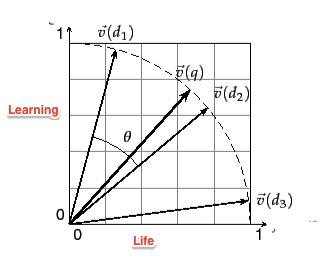

In [67]:
from IPython.display import Image
Image(filename="cosinesimilarity.jpg")

In [68]:
#Normalized TF for the query string("life learning")
def compute_query_tf(query):
    query_norm_tf = {}
    tokens = query.split()
    for word in tokens:
        query_norm_tf[word] = termFrequency(word , query)
    return query_norm_tf
query_norm_tf = compute_query_tf(query)
print(query_norm_tf)

{'life': 0.5, 'quote': 0.5}


In [69]:
#idf score for the query string("life learning")
def compute_query_idf(query):
    idf_dict_qry = {}
    sentence = query.split()
    documents = [doc1, doc2]
    for word in sentence:
        idf_dict_qry[word] = inverseDocumentFrequency(word ,documents)
    return idf_dict_qry
idf_dict_qry = compute_query_idf(query)
print(idf_dict_qry)

{'life': 1.0, 'quote': 1.0}


In [70]:
#tf-idf score for the query string("life learning")
def compute_query_tfidf(query):
    tfidf_dict_qry = {}
    sentence = query.split()
    for word in sentence:
        tfidf_dict_qry[word] = query_norm_tf[word] * idf_dict_qry[word]
    return tfidf_dict_qry
tfidf_dict_qry = compute_query_tfidf(query)
print(tfidf_dict_qry)

{'life': 0.5, 'quote': 0.5}


In [71]:
#import collections.abc
#Cosine Similarity(Query,Document1) = Dot product(Query, Document1) / ||Query|| * ||Document1||

"""
Example : Dot roduct(Query, Document1) 

     life:
     = tfidf(life w.r.t query) * tfidf(life w.r.t Document1) +  / 
     sqrt(tfidf(life w.r.t query)) * 
     sqrt(tfidf(life w.r.t doc1))
     
     learning:
     =tfidf(learning w.r.t query) * tfidf(learning w.r.t Document1)/
     sqrt(tfidf(learning w.r.t query)) * 
     sqrt(tfidf(learning w.r.t doc1))

"""
def cosine_similarity(tfidf_dict_qry, df , query , doc_num):
    dot_product = 0
    qry_mod = 0
    doc_mod = 0
    tokens = query.split()
   
    for keyword in tokens:
        dot_product += tfidf_dict_qry[keyword] * df[keyword][df['doc'] == doc_num]
        #||Query||
        qry_mod += tfidf_dict_qry[keyword] * tfidf_dict_qry[keyword]
        #||Document||
        doc_mod += df[keyword][df['doc'] == doc_num] * df[keyword][df['doc'] == doc_num]
    qry_mod = np.sqrt(qry_mod)
    doc_mod = np.sqrt(doc_mod)
    #implement formula
    denominator = qry_mod * doc_mod
    cos_sim = dot_product/denominator
     
    return cos_sim

from collections.abc import Iterable
def flatten(lis):
     for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                yield x
        else:        
             yield item

In [72]:
def rank_similarity_docs(data):
    cos_sim =[]
    for doc_num in range(0 , len(data)):
        cos_sim.append(cosine_similarity(tfidf_dict_qry, df , query , doc_num).tolist())
    return cos_sim
similarity_docs = rank_similarity_docs(documents)
doc_names = ["Document1", "Document2"]
print(doc_names)
print(list(flatten(similarity_docs)))

['Document1', 'Document2']
[0.8944271909999159, 0.9805806756909201]


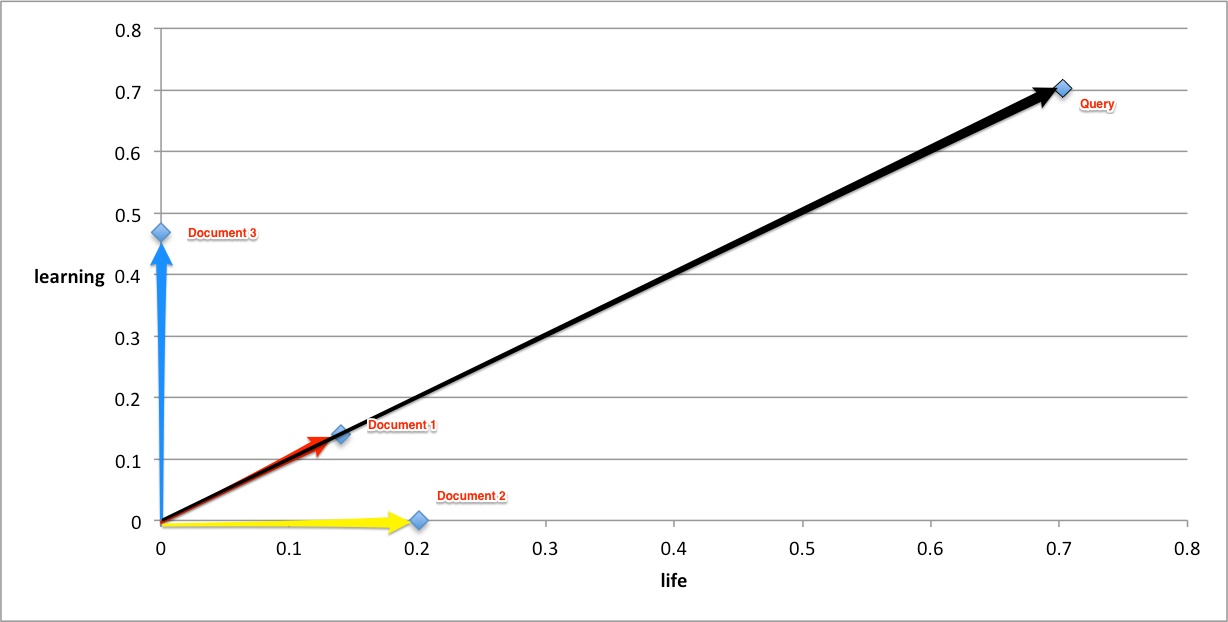

In [73]:
from IPython.display import Image
Image(filename="cosinesimilarity11.jpg")